In [189]:
!pip install pandas > /dev/null

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [82]:
pd.set_option('display.max_columns', 500)
plt.style.use('fivethirtyeight')
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Seasonally and calendar adjusted GDP in chain linked volume index
### Base 2009=100

In [169]:
national_gdp = "GDP.xls"


annual_gdp_df = pd.read_excel(national_gdp, skiprows=7, usecols='B:C', nrows=26, names=['Year', 'Annual GDP'])
quarterly_gdp_df = pd.read_excel(national_gdp, skiprows=7, usecols='O:R', nrows=26, names=['Q1', 'Q2', 'Q3', 'Q4'])
df = pd.concat([annual_gdp_df, quarterly_gdp_df], axis=1)

df['Year']=pd.to_datetime(df['Year'],format='%Y')
df.set_index("Year", inplace = True)
df.index = pd.to_datetime(df.index.year, format='%Y') + pd.offsets.YearEnd()
df.dropna(inplace=True)

df

,Annual GDP,Q1,Q2,Q3,Q4
Year,,,,,
1998-12-31,70.663952,71.633277,71.062687,70.062782,69.881538
1999-12-31,68.343864,68.703461,68.316168,67.163936,69.170405
2000-12-31,73.138146,70.259736,72.995207,74.082337,75.146629
2001-12-31,68.855696,71.295266,67.841696,68.690929,67.534932
2002-12-31,73.266519,70.086120,73.111328,74.110371,75.691616
2003-12-31,77.629633,75.754894,76.009678,78.176876,80.540173
2004-12-31,85.033821,82.758477,84.685344,85.640366,87.029868
2005-12-31,92.744242,91.041903,91.426245,92.717157,95.783132
2006-12-31,99.275545,96.879976,99.831059,99.078846,101.316752


In [193]:
fig = make_subplots(specs=[[{'secondary_y':True}]])

fig.add_trace(go.Scatter(x=df.index, y=df['Annual GDP'], name='Annual GDP', mode='lines+markers'), secondary_y=False)

def adjust_month(year, quarter):
    month_map = {'Q1': '03-31', 'Q2': '06-30', 'Q3': '09-30', 'Q4': '12-31'}
    return f"{year}-{month_map[quarter]}"

quarters = ['Q1','Q2','Q3','Q4']
for quarter in quarters:
    fig.add_trace(go.Bar(x=[adjust_month(year, quarter) for year in df.index.year], y=df[quarter], name=quarter), secondary_y=False)
fig.update_layout(title_text='Turkey GDP seasonally and calendar adjusted chain linked volume index', barmode='group')
fig.update_yaxes(title_text='GDP Index', secondary_y=False)


fig.show()

# Pull National GDP by Construction and Real Estate Activities
### Base 2009=100

In [205]:
cons_df = pd.read_excel(national_gdp, skiprows=115, usecols='B:C', nrows=26, names=['Year', 'GDP by Construction'])
real_es_df = pd.read_excel(national_gdp, skiprows=223, usecols='B:C', nrows=26, names=['Year', 'GDP by Real Estate'])
comb_df = pd.concat([cons_df, real_es_df], axis=1)

# cons_df['Year']=pd.to_datetime(cons_df['Year'],format='%Y')
# cons_df.set_index("Year", inplace = True)
# cons_df.index = pd.to_datetime(cons_df.index.year, format='%Y') + pd.offsets.YearEnd()
# cons_df.dropna(inplace=True)

comb_df

,Year,GDP by Construction,Year,GDP by Real Estate
0,1998,58.592692,1998,78.928142
1,1999,56.408039,1999,83.042104
2,2000,60.199686,2000,87.543228
3,2001,48.079866,2001,89.134284
4,2002,56.671529,2002,91.892215
5,2003,64.613183,2003,93.555725
6,2004,78.539477,2004,95.998909
7,2005,89.864092,2005,97.931587
8,2006,112.791247,2006,98.788414
9,2007,124.740548,2007,99.467180


# Statistical Regions Level 2 (NUTS-2) Annual Unemployment Rate

In [171]:
regional_unemployment = 'Turkey_Regional_Annual_Unemployment_Percentage.xls'

reg_unemp_years = pd.read_excel(regional_unemployment, usecols='B', skiprows=4, nrows=9)
reg_unemp_data = pd.read_excel(regional_unemployment, usecols='C:AB',skiprows=1)

reg_unemp_data.drop(reg_unemp_data.index[0:3], inplace=True)
reg_unemp_data.reset_index(drop=True, inplace=True)
reg_unemp_df = pd.concat([reg_unemp_years,reg_unemp_data], axis=1)
reg_unemp_df.rename(columns={'Unnamed: 1': 'Year'}, inplace=True)
reg_unemp_df.set_index('Year', inplace=True)

reg_unemp_df

,"Adana, Mersin","Ağrı, Kars, Iğdır, Ardahan",Ankara,"Antalya, Isparta, Burdur","Aydın, Denizli, Muğla","Balıkesir, Çanakkale","Bursa, Eskişehir, Bilecik","Erzurum, Erzincan, Bayburt","Gaziantep, Adıyaman, Kilis","Hatay, Kahramanmaraş, Osmaniye",İstanbul,İzmir,"Kastamonu, Çankırı, Sinop","Kayseri, Sivas, Yozgat","Kırıkkale, Aksaray, Niğde, Nevşehir, Kırşehir","Kocaeli, Sakarya, Düzce, Bolu, Yalova","Konya, Karaman","Malatya, Elazığ, Bingöl, Tunceli","Manisa, Afyonkarahisar, Kütahya, Uşak","Mardin, Batman, Şırnak, Siirt","Samsun, Tokat, Çorum, Amasya","Şanlıurfa, Diyarbakır","Tekirdağ, Edirne, Kırklareli","Trabzon, Ordu, Giresun, Rize, Artvin, Gümüşhane","Van, Muş, Bitlis, Hakkari","Zonguldak, Karabük, Bartın"
Year,,,,,,,,,,,,,,,,,,,,,,,,,,
2014,10.7,3.4,11.5,8.3,7.2,5.6,6.2,7.4,8,15.4,11.9,13.9,6.5,9.6,7.7,10,5.6,7.5,3.9,24,6.2,17.4,7.6,6.2,13.5,6
2015,9.8,3.9,11.2,9.6,6.9,5.3,7.8,5.9,9.9,16.4,12.9,15,6.8,9.7,9.9,10.1,6.5,8,4.1,24.8,6.5,17.5,7.3,4.8,9.5,7
2016,10.4,4.9,11.4,11.5,6.7,6.7,9.2,5,14.3,14.4,13.5,14,5.8,8.4,13.4,10.7,6.1,8.9,4.8,28.3,7.9,17.2,7.5,4.5,9.2,8.6
2017,10.7,5.5,11.3,12.1,7.1,6,9.8,5.5,15.1,11.5,13.9,14,4.6,11.9,11.4,10.8,5.9,7,6.2,26.9,6.7,13.8,8.3,3.6,12.8,7.2
2018,11.2,5.3,10.1,11.6,6.9,5.7,9,7.5,12.8,14.1,12.5,13.8,5.1,13.2,10.9,10.2,5.9,8,6.8,25,6.4,18.6,7.5,6.2,21.5,8
2019,11.9,9.8,14.2,13.3,9.2,8.3,11.2,11.2,15.2,18.1,14.9,16,7.6,14.5,13.3,13.5,8,9.9,9.8,30.9,8.3,23.4,11,9.9,25.9,9.6
2020,13.4,11.4,14.8,12.2,9.6,7.8,9.6,10.1,13,15.2,14.7,17.1,6.6,12.8,12,12.2,8,10.6,8.3,33.5,8.3,20.1,9,8.8,23.6,9.3
2021,13.2,13.7,13.4,11.8,10.2,7.9,9.4,10,10.1,17.1,12.3,14.7,5.8,11.7,13,9.6,7.9,10.2,6.9,29.8,7.9,15,9.3,9.9,20.4,10.9
2022,12.3,12.7,12.1,9.2,8.6,7.1,8.9,9.2,10.7,14.6,10.2,13,6.2,9.4,9.4,10.1,7.4,8.1,7.1,18.5,8.1,11.5,7.8,9.2,19.2,11.3


In [178]:
px.line(reg_unemp_df, title = 'Turkey NUTS-2 Subregions Annual Unemployment Rate')

# Statistical Regions Level 2 (NUTS-2) Annual Participation Rate

In [173]:
regional_participation = 'Turkey_Regional_Annual_Participation_Percentage.xls'

reg_part_years = pd.read_excel(regional_participation, usecols='B', skiprows=4, nrows=9)
reg_part_data = pd.read_excel(regional_participation, usecols='C:AB',skiprows=1)

reg_part_data.drop(reg_unemp_data.index[0:3], inplace=True)
reg_part_data.reset_index(drop=True, inplace=True)
reg_part_df = pd.concat([reg_part_years,reg_part_data], axis=1)
reg_part_df.rename(columns={'Unnamed: 1': 'Year'}, inplace=True)
reg_part_df.set_index('Year', inplace=True)

reg_part_df

,"Adana, Mersin","Ağrı, Kars, Iğdır, Ardahan",Ankara,"Antalya, Isparta, Burdur","Aydın, Denizli, Muğla","Balıkesir, Çanakkale","Bursa, Eskişehir, Bilecik","Erzurum, Erzincan, Bayburt","Gaziantep, Adıyaman, Kilis","Hatay, Kahramanmaraş, Osmaniye",İstanbul,İzmir,"Kastamonu, Çankırı, Sinop","Kayseri, Sivas, Yozgat","Kırıkkale, Aksaray, Niğde, Nevşehir, Kırşehir","Kocaeli, Sakarya, Düzce, Bolu, Yalova","Konya, Karaman","Malatya, Elazığ, Bingöl, Tunceli","Manisa, Afyonkarahisar, Kütahya, Uşak","Mardin, Batman, Şırnak, Siirt","Samsun, Tokat, Çorum, Amasya","Şanlıurfa, Diyarbakır","Tekirdağ, Edirne, Kırklareli","Trabzon, Ordu, Giresun, Rize, Artvin, Gümüşhane","Van, Muş, Bitlis, Hakkari","Zonguldak, Karabük, Bartın"
Year,,,,,,,,,,,,,,,,,,,,,,,,,,
2014,49.2,54.8,51.6,56.1,53.9,48,49.3,50.5,43.2,43.3,52.7,53.5,53.2,47.9,48.5,54.5,49.1,46.8,52.3,37.1,49.8,42.3,56.3,52.9,48.5,52.6
2015,50.5,54.2,52.2,55.5,54,47.1,50.3,51,43.1,42.8,54.4,53.5,53.5,48.9,51.6,55.4,51.2,48.2,52.6,38.2,51.1,43.7,57.4,53.9,47.1,51.8
2016,50,51.2,53.2,56.6,53.9,48.6,50.1,49.5,45.2,46,56.3,55.4,57.3,49.6,52.6,53.6,50,49.1,52.3,39.1,52.2,45.2,57.9,54.4,42.4,51.4
2017,49.9,50.7,53.5,56.6,55.4,49.8,51.8,49.3,46.8,47.9,57.4,55.2,57.1,49.4,50.6,54.7,50.3,51.5,53,38.6,52.3,48.1,59.1,54.1,47.7,50.5
2018,50.1,50.3,52.5,56.9,56.9,49.1,53,48.2,46.8,49.4,57.4,56.2,56.5,47.9,51.6,54.9,50.7,52.3,54,40.7,55.2,47.8,59.7,54.6,48.7,49.9
2019,49.5,47.5,52.8,56.8,56.4,48.3,51.3,47.8,47.5,47.9,57.5,56.1,53.3,47.5,51.4,54.1,51,51.5,52.8,43.5,53.8,46.5,59.6,56.3,51,51.1
2020,46.9,44.2,50.3,53.6,51.1,47.7,49.2,47.3,47.8,44.2,52.6,51.7,50.5,44.9,47.6,50.6,48.6,46.6,50.5,39.1,50,38.4,55.9,52.6,47.6,47.2
2021,50.3,50.7,52.4,55.1,53.1,49.4,52.4,47.9,50,48.1,54,52.1,51.6,48.4,50.2,52.5,50.2,48.3,51.3,42.7,53.2,40.6,57.3,55.1,46.6,49.1
2022,52.1,51,53.7,57.5,54.6,51.2,54.9,50,49.7,49.6,56.1,54.4,53.1,50,49.9,56.7,51.1,48,54.4,41.5,54.2,42.5,58.7,55.4,49.7,49.4


In [177]:
px.line(reg_part_df, title = 'Turkey NUTS-2 Subregions Annual Participation Rate')

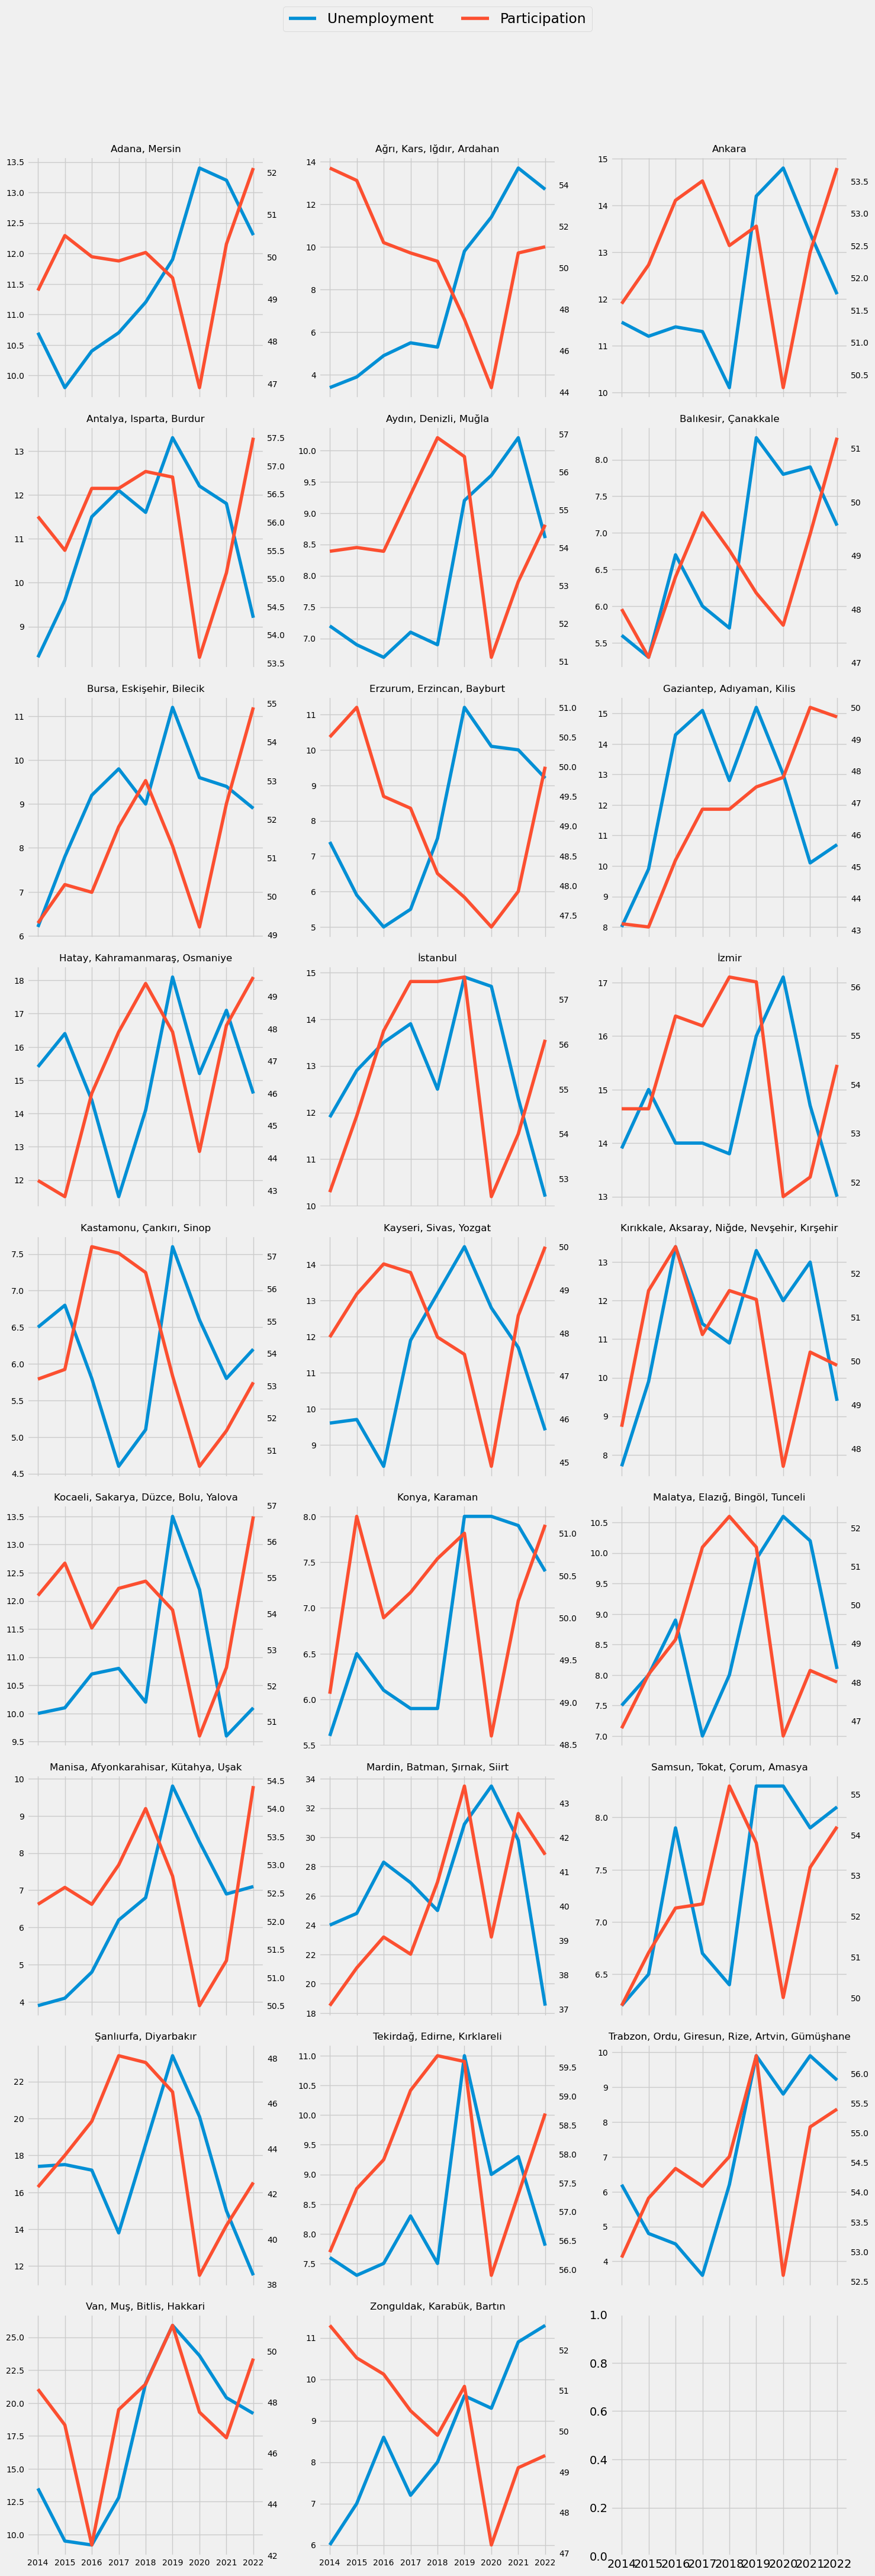

In [192]:
num_regions = len(reg_unemp_df.columns)
num_columns = 3
num_rows = -(-num_regions // num_columns)

fig, axs = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 5), sharex=True)
axs = axs.flatten()

lines, labels = [], []

for i, state in enumerate(reg_unemp_df.columns):
    ax2 = axs[i].twinx()
    
    line1, = axs[i].plot(reg_unemp_df.index, reg_unemp_df[state], label='Unemployment', color=color_pal[0])
    line2, = ax2.plot(reg_part_df.index, reg_part_df[state], label='Participation', color=color_pal[1])

    if i == 0:
        lines.extend([line1, line2])
        labels.extend([line1.get_label(), line2.get_label()])
    
    axs[i].set_title(state)
    axs[i].grid(True)
    ax2.grid(False)

    axs[i].tick_params(axis='both', which='major', labelsize=10)
    ax2.tick_params(axis='y', which='major', labelsize=10)
    axs[i].title.set_size(12)

fig.legend(lines, labels, loc='upper center', ncol=2, fontsize='large')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()